In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [3]:
moviedata = pd.read_csv('tmdb_5000_movies.csv',encoding = 'latin1')
moviedata.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,comedy,war,crime,music,mystery,romance,horror,TV movie,western,adventure
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,0,0,0,0,0,0,1
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,0,0,0,0,0,0,1
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond??s past sends him...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,1,0,0,0,0,0,0,1
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,1,0,0,0,0,0,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,0,0,0,0,0,0,1


In [4]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3744 non-null   int64  
 1   genres                3744 non-null   object 
 2   homepage              1476 non-null   object 
 3   id                    3744 non-null   int64  
 4   keywords              3744 non-null   object 
 5   original_language     3744 non-null   object 
 6   original_title        3744 non-null   object 
 7   overview              3744 non-null   object 
 8   popularity            3744 non-null   float64
 9   production_companies  3744 non-null   object 
 10  production_countries  3744 non-null   object 
 11  release_date          3744 non-null   object 
 12  revenue               3744 non-null   int64  
 13  runtime               3744 non-null   int64  
 14  spoken_languages      3744 non-null   object 
 15  status               

In [5]:
genre= moviedata["genres"].to_list()
regenre=[]
i= 0



for item in genre:
    print(str(i)+"\t",end="")
    regenre.append([])
    for key in eval(item) :   
        regenre[i].append(key["name"])
        print(key["name"]+"\t",end='')
    i=i+1
    print()
    


0	Action	Adventure	Fantasy	Science Fiction	
1	Adventure	Fantasy	Action	
2	Action	Adventure	Crime	
3	Action	Crime	Drama	Thriller	
4	Action	Adventure	Science Fiction	
5	Fantasy	Action	Adventure	
6	Animation	Family	
7	Action	Adventure	Science Fiction	
8	Adventure	Fantasy	Family	
9	Action	Adventure	Fantasy	
10	Adventure	Fantasy	Action	Science Fiction	
11	Adventure	Action	Thriller	Crime	
12	Adventure	Fantasy	Action	
13	Action	Adventure	Western	
14	Action	Adventure	Fantasy	Science Fiction	
15	Adventure	Family	Fantasy	
16	Science Fiction	Action	Adventure	
17	Adventure	Action	Fantasy	
18	Action	Comedy	Science Fiction	
19	Action	Adventure	Fantasy	
20	Action	Adventure	Fantasy	
21	Action	Adventure	
22	Adventure	Fantasy	
23	Adventure	Fantasy	
24	Adventure	Drama	Action	
25	Drama	Romance	Thriller	
26	Adventure	Action	Science Fiction	
27	Thriller	Action	Adventure	Science Fiction	
28	Action	Adventure	Science Fiction	Thriller	
29	Action	Adventure	Thriller	
30	Action	Adventure	Fantasy	
31	Action	Adventu

298	Adventure	Action	Thriller	Science Fiction	
299	Drama	Science Fiction	
300	Animation	Adventure	Family	Fantasy	
301	Action	Crime	
302	Action	Adventure	
303	Adventure	Animation	Family	Fantasy	Science Fiction	
304	Adventure	Comedy	Science Fiction	
305	Action	Adventure	Thriller	
306	Action	Crime	Thriller	
307	Fantasy	Comedy	Family	Adventure	
308	Thriller	Drama	Adventure	Action	History	
309	Action	Comedy	Science Fiction	
310	War	Action	Adventure	Drama	Thriller	
311	Crime	Drama	Mystery	Thriller	
312	Adventure	Action	Fantasy	
313	Drama	History	Crime	
314	Drama	History	War	
315	Animation	Comedy	Family	
316	Action	Comedy	Science Fiction	
317	Action	History	War	
318	Adventure	Fantasy	Action	Thriller	Science Fiction	
319	Comedy	Drama	Romance	
320	Adventure	Animation	Comedy	Family	
321	Animation	Comedy	Adventure	Family	
322	Romance	Fantasy	Family	Drama	
323	Fantasy	Drama	
324	Animation	Family	
325	Adventure	Fantasy	Action	
326	Adventure	Fantasy	Action	
327	Adventure	Fantasy	
328	Adventure	Fanta

747	Action	Science Fiction	Fantasy	Thriller	Horror	
748	Family	Animation	Adventure	
749	Horror	Science Fiction	Mystery	
750	Drama	
751	Drama	
752	Action	Adventure	Drama	History	Romance	War	
753	Action	Drama	Thriller	
754	Horror	Science Fiction	Thriller	
755	Drama	Fantasy	Mystery	Romance	
756	Action	Adventure	Drama	Mystery	Romance	Fantasy	
757	Comedy	Science Fiction	Adventure	Family	
758	Drama	Horror	Thriller	
759	Comedy	
760	Adventure	Family	Fantasy	
761	Action	Comedy	Thriller	Crime	Science Fiction	
762	Comedy	Adventure	
763	Adventure	Fantasy	Action	Drama	
764	Drama	Romance	Adventure	War	
765	Action	Adventure	Fantasy	
766	Action	History	War	
767	Action	Adventure	Comedy	
768	Drama	Comedy	
769	War	Action	
770	Adventure	Horror	Comedy	
771	Comedy	Fantasy	Romance	
772	Science Fiction	Comedy	Family	Romance	
773	Action	Adventure	Thriller	War	
774	Comedy	Romance	Drama	
775	Comedy	Western	
776	Comedy	
777	Comedy	
778	Action	Adventure	Horror	Science Fiction	
779	Drama	Action	Adventure	History	Wa

1091	Comedy	Drama	Romance	
1092	Drama	Horror	Mystery	
1093	Comedy	
1094	Adventure	Action	Thriller	
1095	Fantasy	Thriller	Horror	
1096	Action	Crime	Thriller	
1097	Adventure	Comedy	Family	Fantasy	
1098	Crime	Drama	Thriller	
1099	Drama	Adventure	Action	History	
1100	Action	Comedy	Crime	
1101	Action	Comedy	
1102	Adventure	Fantasy	Action	Western	Thriller	
1103	Action	Comedy	Crime	
1104	Drama	
1105	Adventure	Drama	Romance	Action	
1106	Thriller	Fantasy	Action	Comedy	
1107	Mystery	Thriller	Drama	
1108	Action	Thriller	Crime	
1109	Comedy	
1110	Drama	
1111	Drama	Crime	
1112	Comedy	Romance	Drama	
1113	Crime	Drama	Mystery	Thriller	
1114	Adventure	Comedy	Family	Science Fiction	
1115	Action	Science Fiction	
1116	Drama	Romance	Thriller	
1117	Action	Adventure	Comedy	Family	Science Fiction	
1118	Crime	Drama	Thriller	
1119	Comedy	
1120	Action	Drama	Thriller	War	
1121	Comedy	
1122	Horror	
1123	Drama	
1124	Comedy	Romance	Drama	
1125	Comedy	
1126	Horror	Mystery	
1127	Adventure	Comedy	Family	Science Fiction	

1445	Action	Comedy	Romance	Thriller	
1446	Drama	
1447	Action	Science Fiction	Thriller	Crime	
1448	Fantasy	Drama	Horror	Action	Thriller	Science Fiction	
1449	Fantasy	Comedy	Family	
1450	Comedy	
1451	Animation	Comedy	Family	Music	
1452	War	Crime	Drama	Mystery	Romance	Thriller	
1453	Adventure	
1454	Drama	War	
1455	Comedy	Drama	Romance	
1456	Action	
1457	Drama	
1458	Drama	
1459	Action	Adventure	Thriller	Science Fiction	
1460	Comedy	Drama	
1461	Drama	Mystery	
1462	Comedy	Horror	
1463	Crime	Drama	Science Fiction	Thriller	
1464	Comedy	
1465	Comedy	Thriller	Crime	
1466	Action	Comedy	Crime	Drama	Music	
1467	Comedy	Drama	
1468	Comedy	Romance	
1469	Animation	Comedy	Family	
1470	Action	Adventure	Crime	
1471	Drama	Romance	
1472	Drama	
1473	Drama	
1474	Action	Adventure	Thriller	
1475	Drama	
1476	Comedy	
1477	Horror	Comedy	Fantasy	
1478	Crime	Comedy	Adventure	
1479	Comedy	Family	Romance	
1480	Comedy	
1481	Crime	Mystery	Thriller	
1482	Science Fiction	
1483	Animation	Comedy	Family	
1484	Thriller	Crime	

1802	Drama	History	
1803	Action	Adventure	Comedy	Fantasy	
1804	Action	Drama	
1805	Drama	Thriller	
1806	Drama	War	
1807	Drama	Mystery	Thriller	
1808	Drama	Thriller	
1809	Horror	Thriller	
1810	Comedy	Romance	Drama	
1811	Drama	Thriller	
1812	Comedy	Drama	
1813	Adventure	Drama	
1814	Action	Adventure	Comedy	Fantasy	Science Fiction	
1815	Comedy	Romance	
1816	Drama	
1817	Action	Comedy	Fantasy	Science Fiction	
1818	Drama	Mystery	Science Fiction	Thriller	
1819	Action	Adventure	Fantasy	Horror	
1820	Comedy	Drama	
1821	Drama	Mystery	Thriller	
1822	Drama	
1823	Comedy	Drama	Romance	
1824	Drama	Romance	Crime	Mystery	
1825	Drama	Crime	
1826	Comedy	Drama	
1827	Family	Animation	
1828	Thriller	Crime	Drama	
1829	Romance	Adventure	Action	History	
1830	History	Action	Drama	
1831	Crime	Action	Thriller	
1832	Action	Thriller	
1833	Drama	Romance	
1834	Adventure	Drama	
1835	Science Fiction	Adventure	
1836	Drama	
1837	Horror	Mystery	
1838	Action	Drama	Western	
1839	Comedy	Romance	
1840	Comedy	Crime	
1841	Drama	Fa

2179	Romance	Science Fiction	Horror	Action	Crime	
2180	Drama	Mystery	Thriller	
2181	Music	
2182	Drama	
2183	Crime	Drama	Thriller	History	
2184	Thriller	Drama	
2185	Horror	Science Fiction	
2186	Action	Crime	Drama	Thriller	
2187	Action	Animation	Science Fiction	
2188	Adventure	Fantasy	Action	
2189	Thriller	
2190	Comedy	
2191	Horror	Action	
2192	Music	Drama	Romance	
2193	Animation	Comedy	Family	
2194	Drama	History	War	
2195	Action	Crime	Drama	Thriller	
2196	Drama	Music	
2197	Thriller	Action	
2198	Horror	Action	Thriller	Science Fiction	
2199	Drama	Family	Music	Romance	
2200	Horror	Thriller	Mystery	
2201	Comedy	
2202	Comedy	Drama	Romance	
2203	Comedy	
2204	Horror	Thriller	
2205	Comedy	Family	Science Fiction	
2206	Comedy	
2207	Action	Comedy	Crime	Thriller	
2208	Horror	Crime	
2209	Comedy	Romance	
2210	Comedy	
2211	Drama	Fantasy	Romance	
2212	Horror	Thriller	
2213	Drama	
2214	Comedy	Music	Romance	
2215	Drama	Comedy	Romance	
2216	Horror	Thriller	
2217	Crime	Drama	Thriller	
2218	Action	Drama	His

2567	Comedy	Romance	
2568	Comedy	
2569	Mystery	Thriller	
2570	Drama	Romance	
2571	Horror	Drama	Science Fiction	
2572	Comedy	Horror	Thriller	Western	
2573	Comedy	Drama	
2574	Comedy	Drama	
2575	Drama	Horror	Thriller	
2576	Fantasy	Drama	Science Fiction	Romance	
2577	Crime	Drama	Romance	
2578	Adventure	Drama	Family	
2579	Drama	Romance	
2580	Crime	Drama	Thriller	
2581	Comedy	
2582	Thriller	Drama	Mystery	
2583	Drama	Thriller	
2584	Comedy	
2585	Thriller	Science Fiction	Mystery	
2586	Drama	History	War	
2587	Animation	Family	Action	Adventure	Comedy	
2588	Science Fiction	
2589	War	Drama	
2590	Horror	
2591	Drama	
2592	Drama	
2593	Thriller	Crime	
2594	Drama	Horror	
2595	Drama	
2596	Fantasy	Horror	Comedy	
2597	Adventure	Action	Science Fiction	
2598	Comedy	
2599	Drama	Romance	War	
2600	Drama	
2601	Action	Comedy	Documentary	
2602	Comedy	Drama	
2603	Drama	
2604	Action	Comedy	Crime	
2605	Comedy	
2606	Thriller	Drama	
2607	Drama	Romance	
2608	Drama	
2609	Drama	Romance	Thriller	
2610	Horror	Mystery	
2611	

2941	Comedy	
2942	Drama	Romance	
2943	Comedy	Drama	
2944	Comedy	Drama	
2945	Drama	
2946	Mystery	Drama	Adventure	
2947	Drama	Romance	
2948	Romance	Drama	
2949	Comedy	
2950	Drama	Science Fiction	
2951	Crime	Thriller	Comedy	
2952	Action	Thriller	Crime	
2953	Horror	Thriller	
2954	Animation	Fantasy	
2955	Adventure	Science Fiction	
2956	Comedy	Drama	
2957	Thriller	Crime	Drama	
2958	Action	Thriller	Crime	
2959	Horror	Thriller	
2960	Drama	War	Mystery	
2961	Drama	Action	Crime	
2962	Horror	
2963	Comedy	Drama	Foreign	Romance	
2964	Crime	Drama	
2965	Drama	Music	
2966	Horror	Mystery	Thriller	
2967	Action	Adventure	Drama	Family	
2968	Crime	Comedy	Thriller	
2969	Comedy	Drama	Romance	
2970	Science Fiction	Thriller	
2971	Drama	
2972	Drama	Thriller	Crime	
2973	Drama	
2974	Drama	Thriller	
2975	Romance	Drama	
2976	Drama	History	
2977	Action	Drama	Thriller	Adventure	
2978	Action	Thriller	Science Fiction	
2979	Comedy	Drama	Romance	
2980	Drama	
2981	Comedy	Horror	
2982	Romance	Comedy	
2983	Romance	
2984	Dram

3361	Documentary	
3362	Horror	Mystery	Science Fiction	
3363	Action	Science Fiction	
3364	Action	Drama	Western	
3365	Drama	Romance	
3366	Comedy	Drama	Romance	
3367	Drama	Romance	
3368	Science Fiction	Comedy	Drama	Crime	
3369	Comedy	Drama	Romance	
3370	Drama	
3371	Comedy	Romance	
3372	Drama	Science Fiction	Thriller	
3373	Comedy	Action	Drama	
3374	Comedy	Horror	
3375	Horror	
3376	Drama	
3377	Adventure	Comedy	Science Fiction	
3378	Crime	
3379	Drama	Crime	
3380	Action	Adventure	Science Fiction	
3381	Comedy	Music	
3382	Drama	Family	
3383	Music	Romance	
3384	Fantasy	Adventure	Animation	Comedy	Family	Music	
3385	Animation	Family	Music	
3386	Horror	Thriller	
3387	Horror	Thriller	
3388	Drama	
3389	Thriller	Drama	
3390	Drama	History	Romance	
3391	Drama	Crime	
3392	Horror	Mystery	
3393	Action	Thriller	Adventure	
3394	Comedy	Romance	Science Fiction	
3395	Horror	Thriller	
3396	Comedy	
3397	Crime	Drama	
3398	Adventure	Action	Thriller	Science Fiction	
3399	Crime	Drama	
3400	Horror	Mystery	
3401	Drama	

In [6]:
stat = {"scifi":0,
        "thriller":0,
        "action":0,
        "animated":0,
        "documentary":0,
        "drama":0,
        "family":0,
        "fantasy":0,
        "history":0,
        "comedy":0,
        "war":0,
        "crime":0,
        "music":0,
        "mystery" :0,
        "romance" :0,
        "horror" :0,
        "TV movie" :0,
        "western" :0,
        "adventure" :0,}



for item in regenre:
    if "Science Fiction" in item: stat["scifi"]+=1
    if "Thriller" in item: stat["thriller"]+=1
    if "Action" in item: stat["action"]+=1
    if "Animation" in item: stat["animated"]+=1
    if "Documentary" in item: stat["documentary"]+=1
    if "Drama" in item: stat["drama"]+=1
    if "Family" in item: stat["family"]+=1
    if "Fantasy" in item: stat["fantasy"]+=1
    if "History" in item: stat["history"]+=1
    if "Comedy" in item: stat["comedy"]+=1
    if "War" in item: stat["war"]+=1
    if "Crime" in item: stat["crime"]+=1
    if "Music" in item: stat["music"]+=1
    if "Mystery" in item: stat["mystery"]+=1
    if "Romance" in item: stat["romance"]+=1
    if "Horror" in item: stat["horror"]+=1
    if "TV Movie" in item: stat["TV movie"]+=1
    if "Western" in item: stat["western"]+=1
    if "Adventure" in item: stat["adventure"]+=1

for key in stat:
    print("Frequency of "+key+" is\t"+str(stat[key]))

Frequency of scifi is	474
Frequency of thriller is	1071
Frequency of action is	1008
Frequency of animated is	204
Frequency of documentary is	54
Frequency of drama is	1723
Frequency of family is	408
Frequency of fantasy is	376
Frequency of history is	162
Frequency of comedy is	1308
Frequency of war is	131
Frequency of crime is	591
Frequency of music is	137
Frequency of mystery is	296
Frequency of romance is	677
Frequency of horror is	406
Frequency of TV movie is	3
Frequency of western is	65
Frequency of adventure is	714


In [7]:
appearance = {"scifi":[],
        "thriller":[],
        "action":[],
        "animated":[],
        "documentary":[],
        "drama":[],
        "family":[],
        "fantasy":[],
        "history":[],
        "comedy":[],
        "war":[],
        "crime":[],
        "music":[],
        "mystery" :[],
        "romance" :[],
        "horror" :[],
        "TV movie" :[],
        "western" :[],
        "adventure" :[],}
for item in regenre:
        if "Science Fiction" in item: appearance["scifi"].append(1)  
        else : appearance["scifi"].append(0)
        if "Thriller" in item: appearance["thriller"].append(1)  
        else: appearance["thriller"].append(0)
        if "Action" in item: appearance["action"].append(1)  
        else : appearance["action"].append(0)
        if "Animation" in item: appearance["animated"].append(1)  
        else : appearance["animated"].append(0)
        if "Documentary" in item: appearance["documentary"].append(1)  
        else : appearance["documentary"].append(0)
        if "Drama" in item: appearance["drama"].append(1)  
        else : appearance["drama"].append(0)
        if "Family" in item: appearance["family"].append(1)  
        else : appearance["family"].append(0)
        if "Fantasy" in item: appearance["fantasy"].append(1)  
        else : appearance["fantasy"].append(0)
        if "History" in item: appearance["history"].append(1)  
        else : appearance["history"].append(0)
        if "Comedy" in item: appearance["comedy"].append(1)  
        else : appearance["comedy"].append(0)
        if "War" in item: appearance["war"].append(1)  
        else : appearance["war"].append(0)
        if "Crime" in item: appearance["crime"].append(1)  
        else : appearance["crime"].append(0)
        if "Music" in item: appearance["music"].append(1)  
        else : appearance["music"].append(0)
        if "Mystery" in item: appearance["mystery"].append(1)  
        else : appearance["mystery"].append(0)
        if "Romance" in item: appearance["romance"].append(1)  
        else : appearance["romance"].append(0)
        if "Horror" in item: appearance["horror"].append(1)  
        else : appearance["horror"].append(0)
        if "TV Movie" in item: appearance["TV movie"].append(1)  
        else : appearance["TV movie"].append(0)
        if "Western" in item: appearance["western"].append(1)  
        else : appearance["western"].append(0)
        if "Adventure" in item: appearance["adventure"].append(1)  
        else : appearance["adventure"].append(0)

In [8]:
movie_genre=[
        "scifi",
        "thriller",
        "action",
        "animated",
        "documentary",
        "drama",
        "family",
        "fantasy",
        "history",
        "comedy",
        "war",
        "crime",
        "music",
        "mystery",
        "romance",
        "horror",
        "TV movie",
        "western",
        "adventure",
            ]

# Analysing Movie Genre

In [9]:
from openpyxl import Workbook, load_workbook
wb = load_workbook("test.xlsx")
sheet = wb["Sheet1"]
i=1
for item in movie_genre:
    sheet.cell(row=1,column=i).value=item
    i+=1
i=1
for word in movie_genre:
    j=2
    for item in appearance[word]:
        sheet.cell(row=j,column=i).value=item
        j+=1
    i+=1
wb.save("test.xlsx")

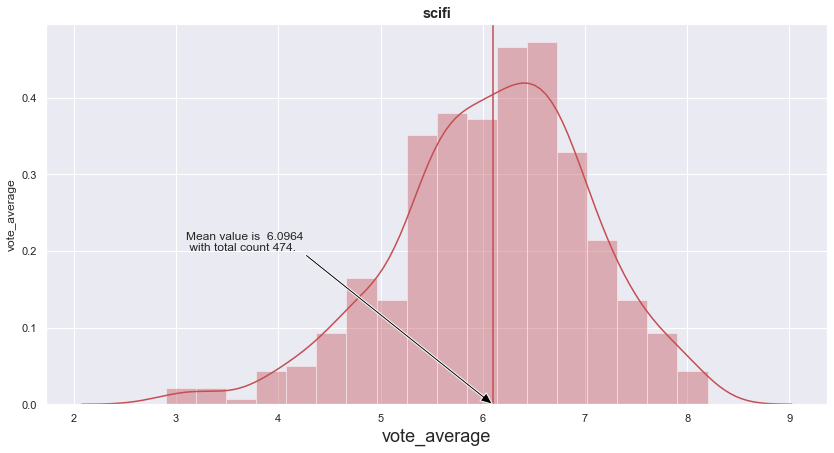

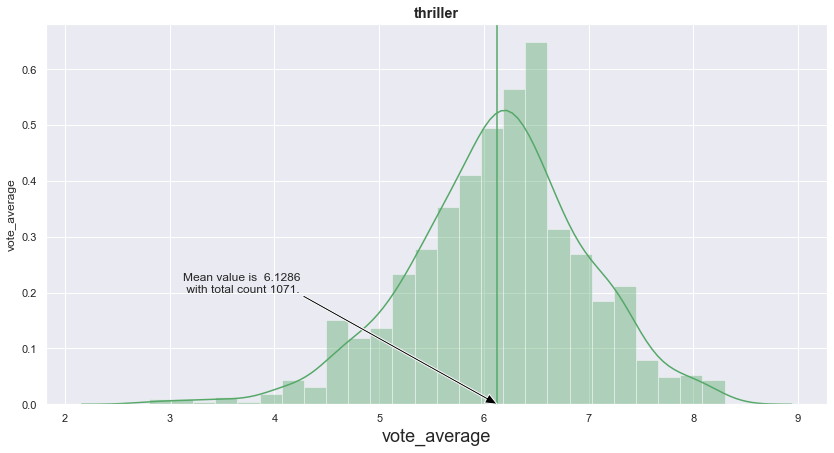

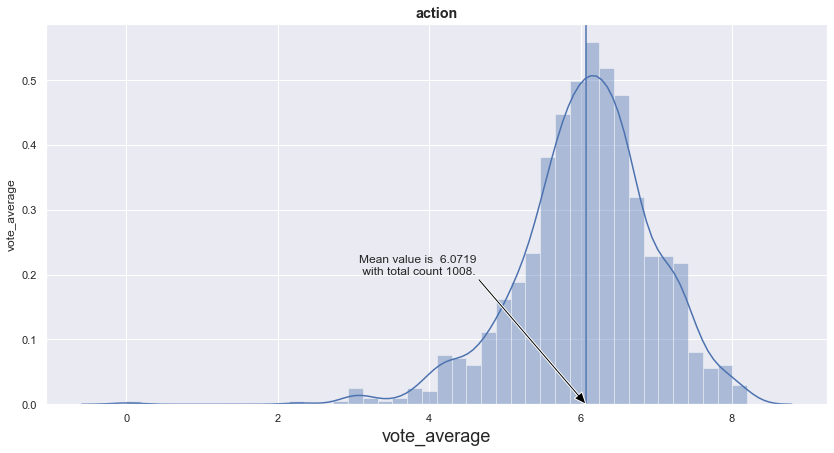

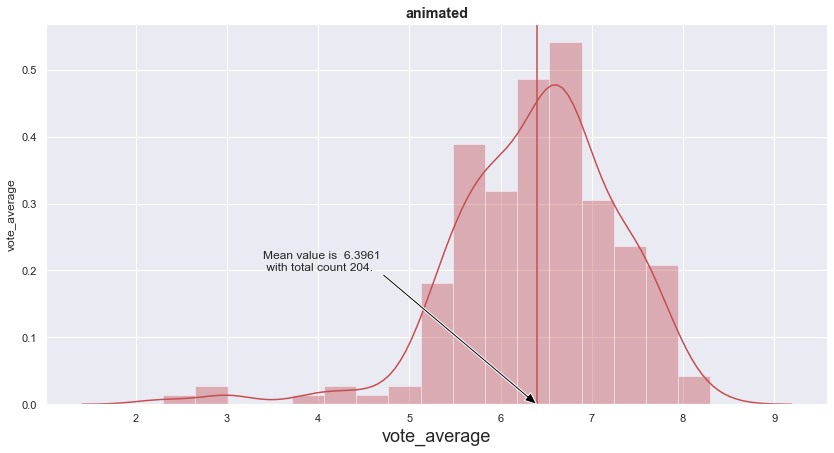

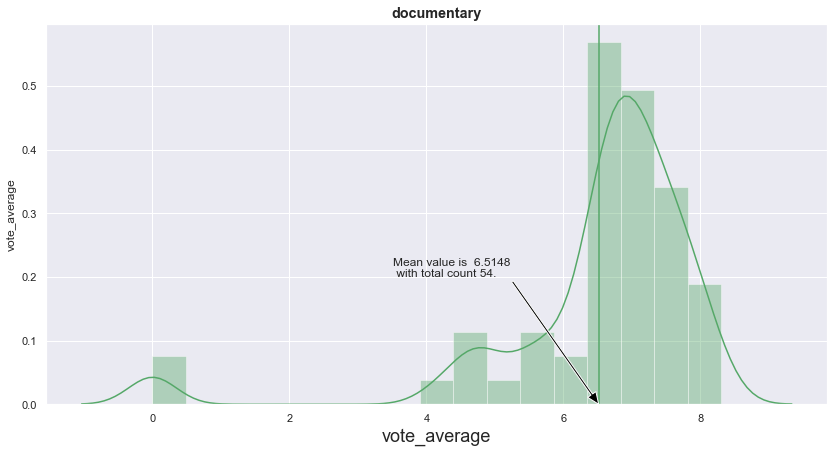

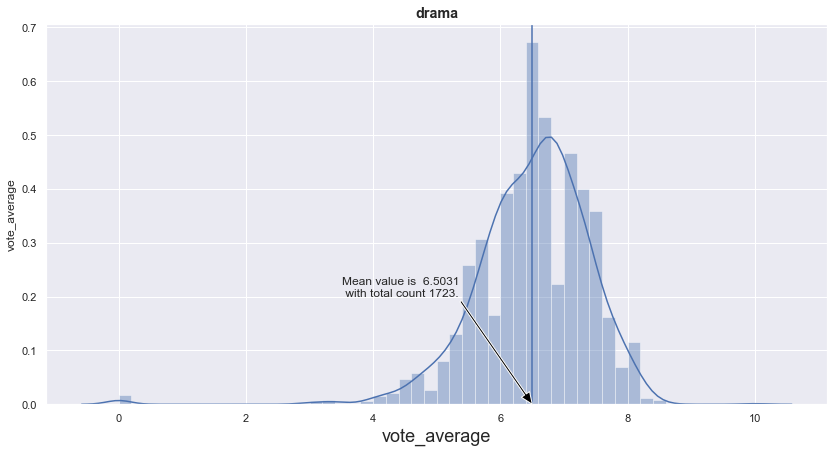

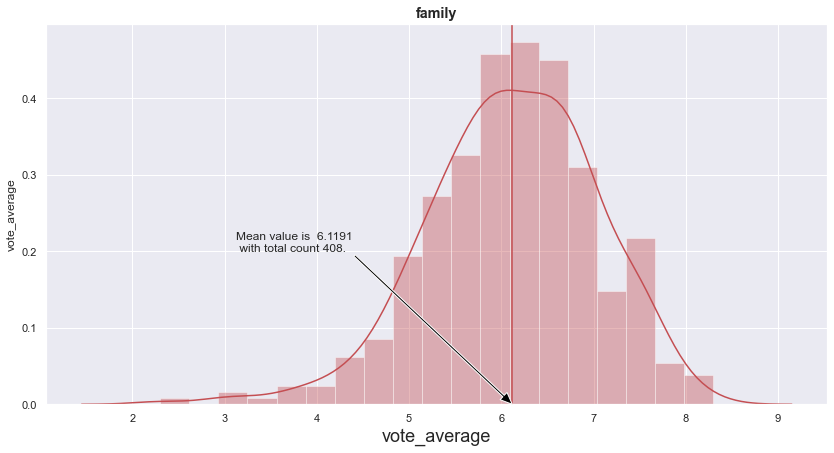

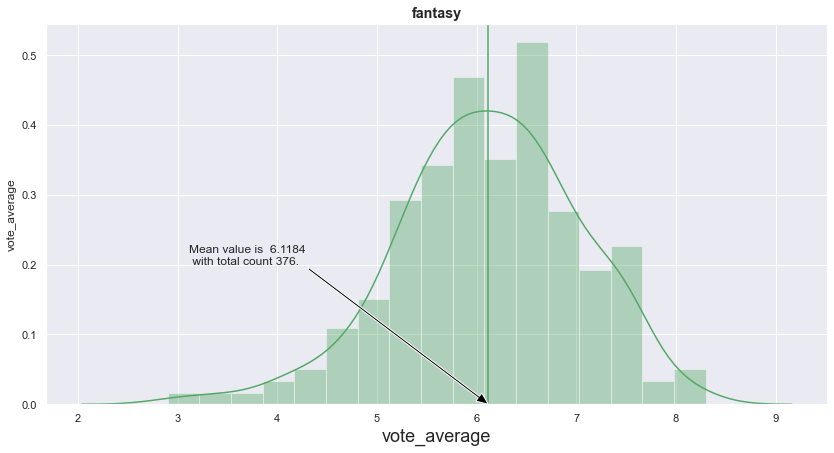

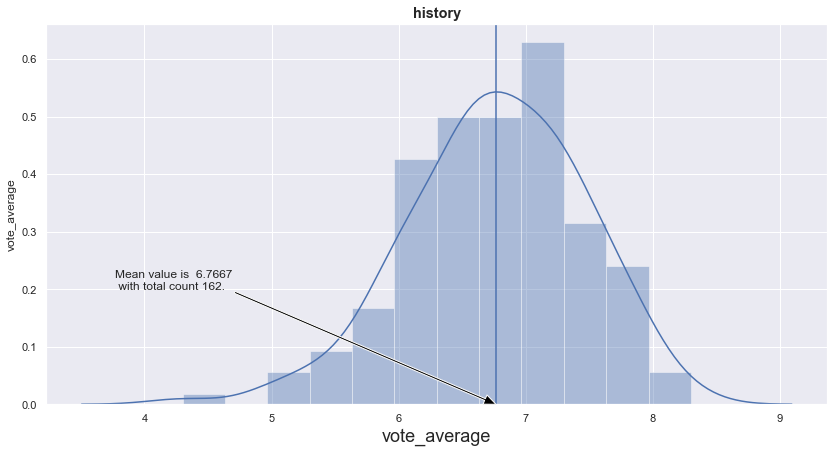

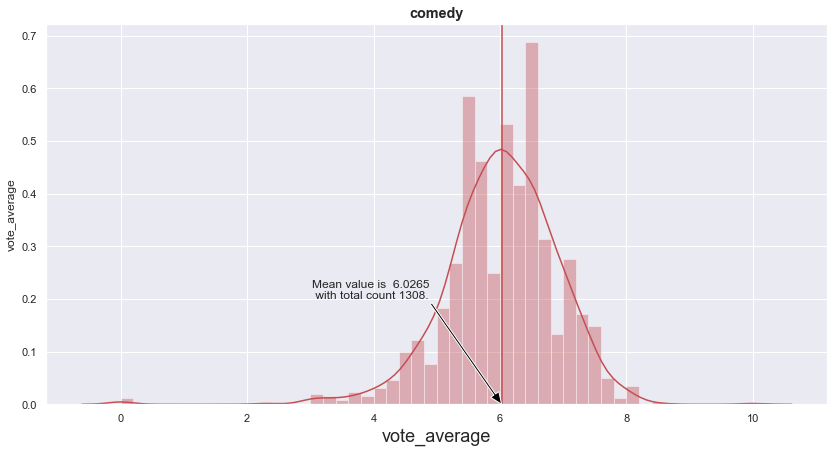

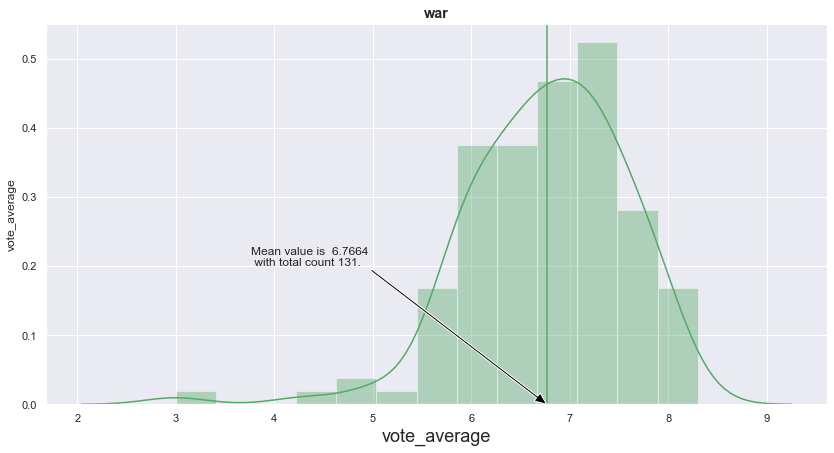

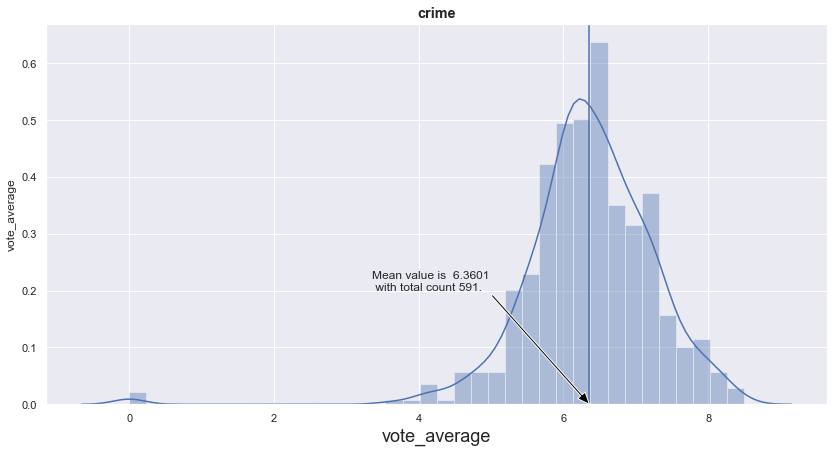

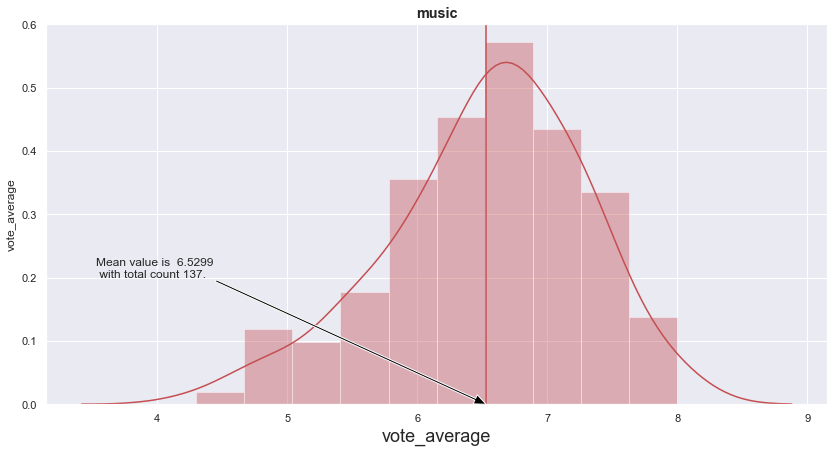

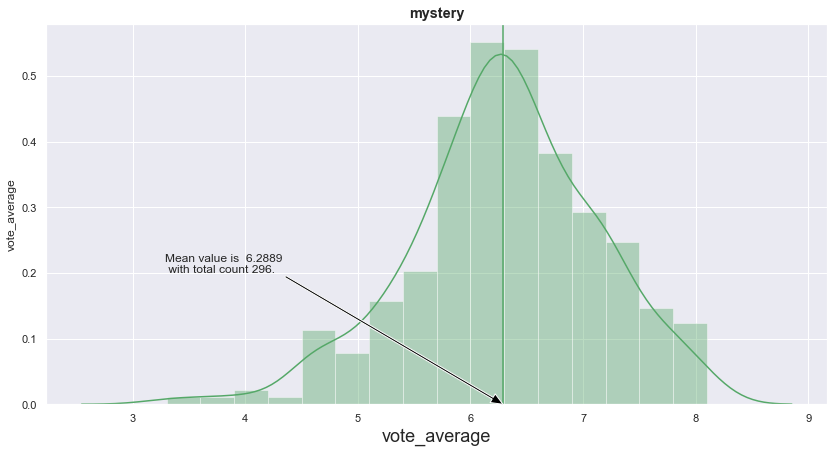

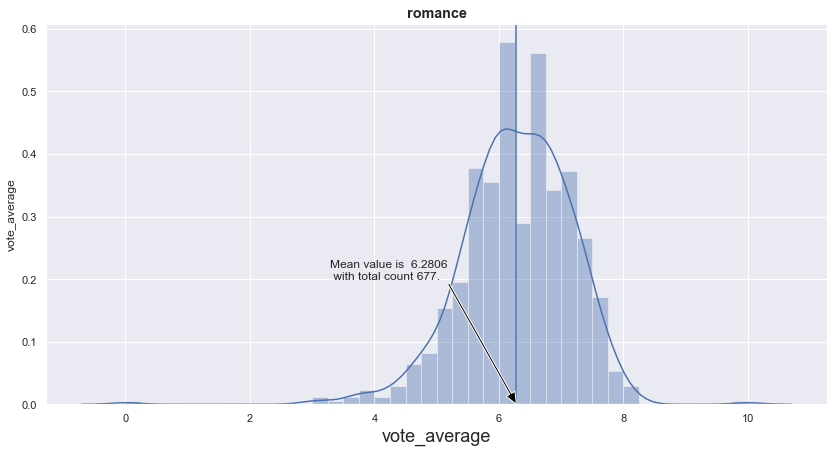

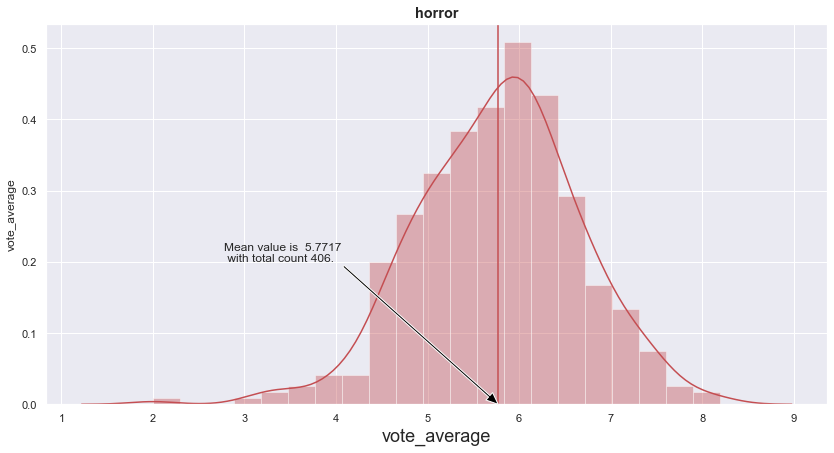

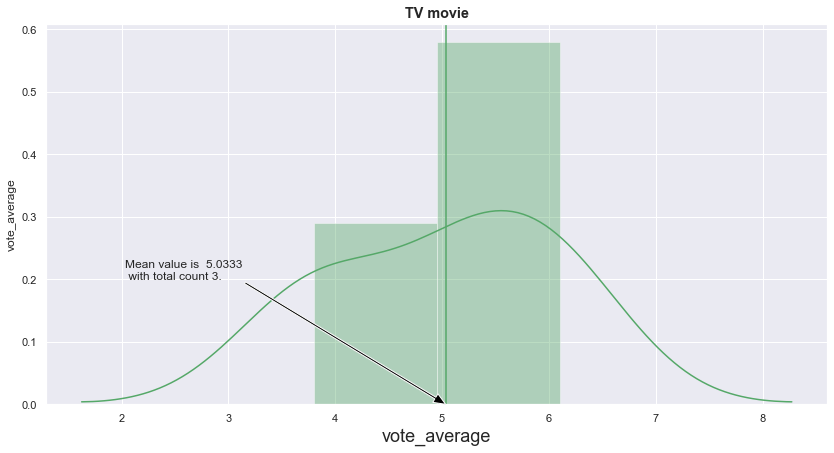

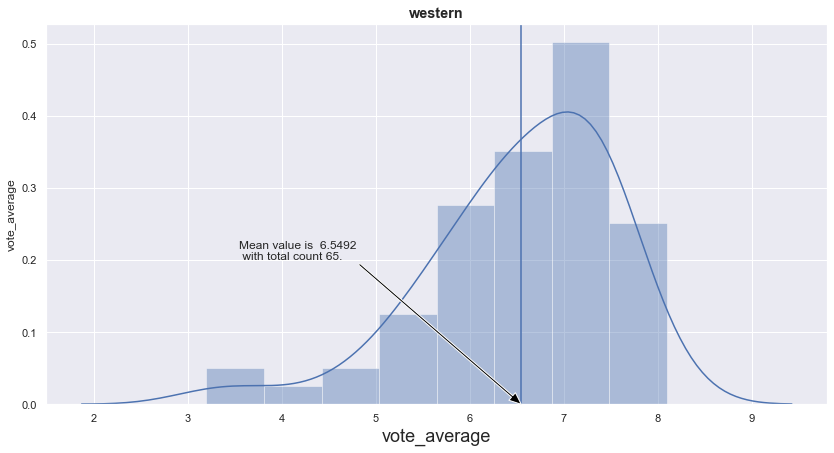

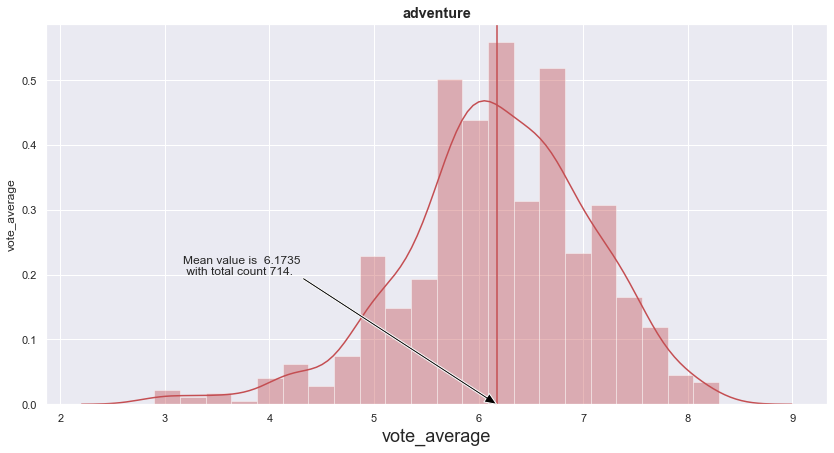

In [10]:
import random
countlist=[]
count= 0
palette = 'rgby'
average=[]
var = []

for item in movie_genre:
    vote=moviedata[moviedata[item]== 1]["vote_average"]
    ran = count%3
    f, axes = plt.subplots(1, 1, figsize=(14, 7))
    axes.set(ylabel = "vote_average")
    plt.xlabel('xlabel', fontsize=18)
    sb.distplot(vote,color = palette[ran],)
    plt.title(item,fontsize='large',fontweight= 'bold')
    anno = str(stat[item])
    plt.axvline(vote.mean(), 0,1,color=palette[ran])
    plt.annotate("Mean value is  "+str(round(vote.mean(),4))+"\n with total count "+anno+".", 
                 xy=(vote.mean(), 0), xytext=(vote.mean()-3, 0.2), arrowprops=dict(facecolor='black', headwidth=10, width=2))
    count+=1
    average.append(vote.mean())
    var.append(vote.var())

In [11]:
print("\t\taverage\tcount")
for i in range(0,19):
    print(movie_genre[i]+"\t\t"+str(round(average[i],3))+"\t"+str(stat[movie_genre[i]])+"\t"+str(round(var[i],3)))

		average	count
scifi		6.096	474	0.896
thriller		6.129	1071	0.707
action		6.072	1008	0.815
animated		6.396	204	0.81
documentary		6.515	54	2.51
drama		6.503	1723	0.824
family		6.119	408	0.839
fantasy		6.118	376	0.836
history		6.767	162	0.478
comedy		6.027	1308	0.808
war		6.766	131	0.636
crime		6.36	591	0.828
music		6.53	137	0.563
mystery		6.289	296	0.691
romance		6.281	677	0.779
horror		5.772	406	0.79
TV movie		5.033	3	1.343
western		6.549	65	0.987
adventure		6.174	714	0.799


In [12]:
cate = []
for item in regenre:
    value = 0
    if "Drama" in item:
        value+=8
    if "Comedy" in item:
        value+=4
    if "Thriller" in item:
        value+=2
    if "Action" in item:
        value+=1
    cate.append(value)

dcta
0000  0
0001  1
0010  2
0011  3
0100  4
0101  5  
0110  6
0111  7
1000  8
1001  9
1010  10
1011  11
1100  12
1101  13
1110  14
1111  15


In [13]:
from openpyxl import Workbook, load_workbook
wb = load_workbook("test.xlsx")
sheet = wb["Sheet1"]
i=2
for item in cate:
    sheet.cell(row=i,column=21).value=item
    i+=1
wb.save("test.xlsx")

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
x = moviedata[['category','popularity',"budget"]]
y = moviedata["quality"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [15]:
y_pred = model.predict(x_train)
y_pred

array(['common', 'common', 'common', ..., 'common', 'common', 'common'],
      dtype='<U6')

In [16]:
accuracy = accuracy_score(y_train,y_pred)*100
accuracy

82.15811965811966

In [17]:
y_pred_test = model.predict(x_test)
y_pred_test

array(['common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'common',
       'common', 'common', 'common', 'common', 'common', 'comm

In [18]:
accuracy_test = accuracy_score(y_test,y_pred_test)*100
accuracy_test

79.59401709401709